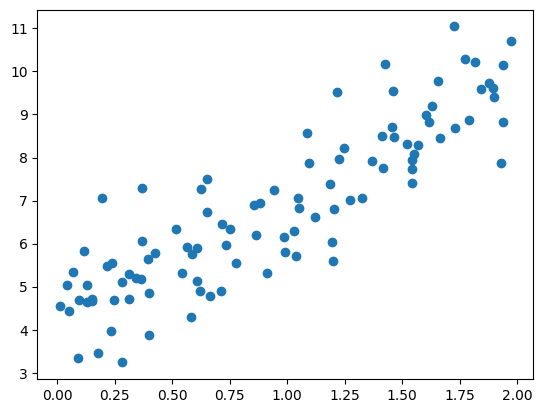

In [1]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m,1)

plt.scatter(X, y)

In [2]:
X, y

(array([[0.74908024],
        [1.90142861],
        [1.46398788],
        [1.19731697],
        [0.31203728],
        [0.31198904],
        [0.11616722],
        [1.73235229],
        [1.20223002],
        [1.41614516],
        [0.04116899],
        [1.9398197 ],
        [1.66488528],
        [0.42467822],
        [0.36364993],
        [0.36680902],
        [0.60848449],
        [1.04951286],
        [0.86389004],
        [0.58245828],
        [1.22370579],
        [0.27898772],
        [0.5842893 ],
        [0.73272369],
        [0.91213997],
        [1.57035192],
        [0.39934756],
        [1.02846888],
        [1.18482914],
        [0.09290083],
        [1.2150897 ],
        [0.34104825],
        [0.13010319],
        [1.89777107],
        [1.93126407],
        [1.6167947 ],
        [0.60922754],
        [0.19534423],
        [1.36846605],
        [0.88030499],
        [0.24407647],
        [0.99035382],
        [0.06877704],
        [1.8186408 ],
        [0.51755996],
        [1

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
X_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

In [4]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ (X_b.T) @ y 

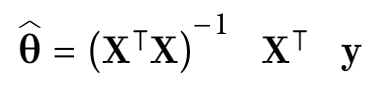

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

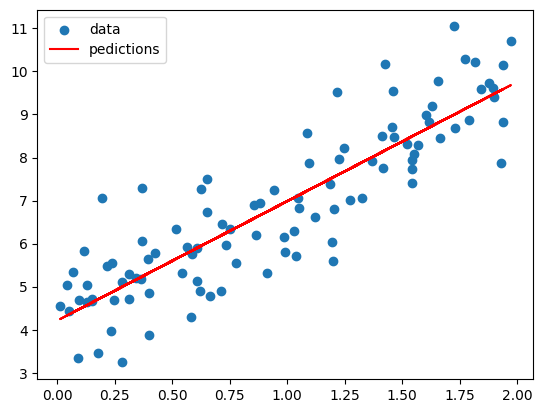

In [6]:
y_predict = X_b @ theta_best

plt.scatter(X, y, label="data")
plt.plot(X, y_predict, c='r', label="pedictions")
plt.legend()

[4.21509616] [[2.77011339]]


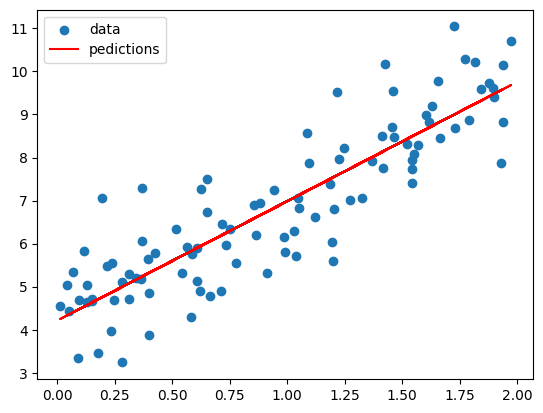

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

y_predict = lin_reg.predict(X)

print(lin_reg.intercept_, lin_reg.coef_)

plt.scatter(X, y, label="data")
plt.plot(X, y_predict, c='r', label="pedictions")
plt.legend()

In [8]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

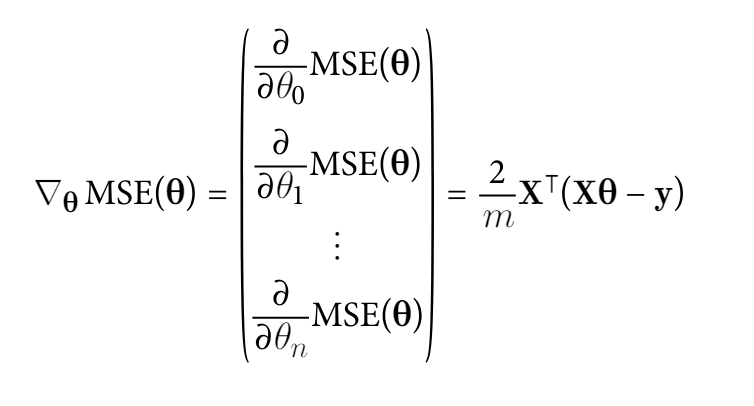

In [9]:
epochs = 1000
lr = 0.1
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

print(f"starting parameters: {theta}")

for epoch in range(epochs):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    theta = theta - lr * gradients

print(theta)

starting parameters: [[ 0.49671415]
 [-0.1382643 ]]
[[4.21509616]
 [2.77011339]]


In [10]:
epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparams

def learning_schedule(t):
    return t0 / (t+t1)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[[random_index]]
        yi = y[[random_index]]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        theta = theta - learning_schedule(epoch  * m + iteration) * gradients

theta

array([[4.21076011],
       [2.74856079]])

In [11]:
epochs = 100
t0, t1 = 5, 50 # learning schedule hyperparams
batch_size = 32
m=batch_size

def learning_schedule(t):
    return t0 / (t+t1)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[[random_index]]
        yi = y[[random_index]]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        theta = theta - learning_schedule(epoch  * m + iteration) * gradients

theta

array([[4.22848436],
       [2.55012335]])

In [12]:
np.random.seed(42)

m = 100
X = 6 * np.random.randn(m,1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [13]:
X[:20], y[:20]

(array([[ -0.01971508],
        [ -3.82958581],
        [  0.88613123],
        [  6.13817914],
        [ -4.40492025],
        [ -4.40482174],
        [  6.47527689],
        [  1.60460837],
        [ -5.81684632],
        [  0.25536026],
        [ -5.78050616],
        [ -5.79437852],
        [ -1.54822637],
        [-14.47968147],
        [-13.349507  ],
        [ -6.37372518],
        [ -9.07698672],
        [ -1.114516  ],
        [ -8.44814445],
        [-11.47382221]]),
 array([[ 0.56510852],
        [ 5.0826326 ],
        [ 2.93603099],
        [26.17452344],
        [ 7.13545524],
        [ 7.7004564 ],
        [31.32606822],
        [ 5.06657021],
        [13.3585546 ],
        [ 2.21351878],
        [11.00784834],
        [12.96651883],
        [ 1.71050629],
        [94.81414835],
        [77.56280055],
        [16.24000847],
        [34.08414548],
        [ 0.33787892],
        [30.38025071],
        [57.10240886]]))

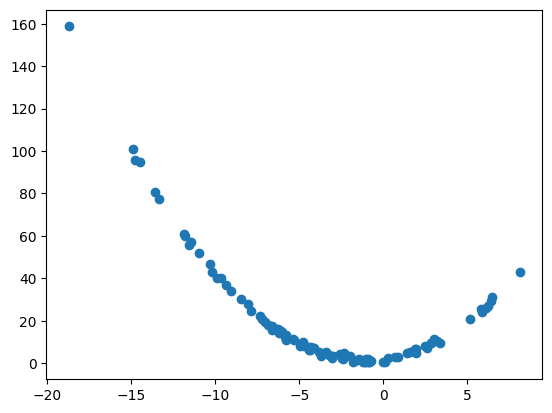

In [14]:
plt.scatter(X, y)

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [17]:
lin_reg.intercept_, lin_reg.coef_

(array([1.87009469]), array([[1.01811444, 0.50512305]]))

In [18]:
y_pred = lin_reg.predict(X_poly)

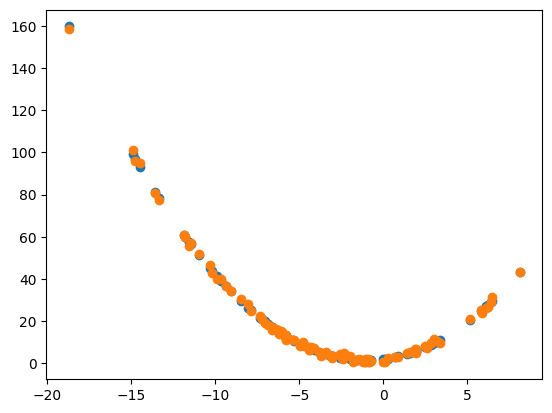

In [19]:
plt.scatter(X, y_pred)
plt.scatter(X, y)

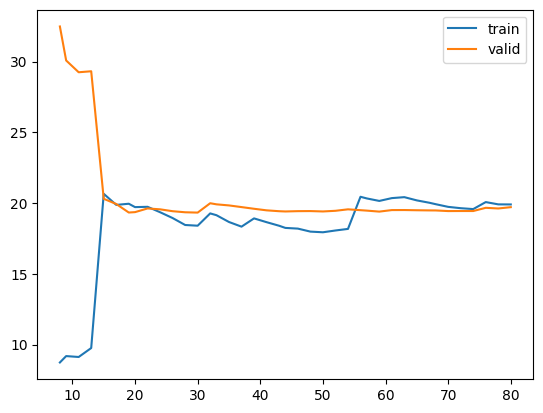

In [20]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, train_sizes=np.linspace(0.1, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, label="train")
plt.plot(train_sizes, valid_errors, label="valid")
plt.legend()
plt.show()

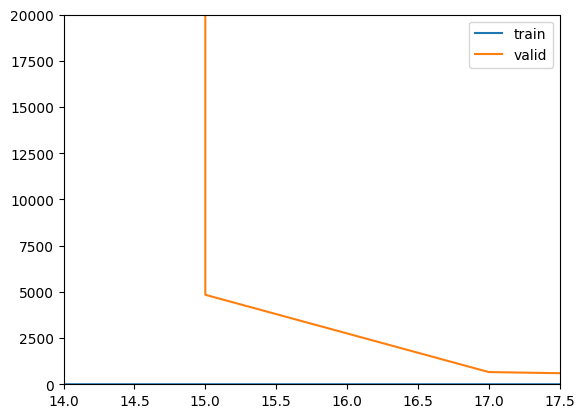

In [21]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, label="train")
plt.plot(train_sizes, valid_errors, label="valid")
plt.legend()
plt.xlim(14, 17.5)
plt.ylim(0.0, 20000.0)
plt.show()

In [22]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[3.66585975]])

In [23]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None, max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.08748715])

In [24]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([3.68274416])

In [25]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l1", alpha=0.1, tol=None, max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.10457398])

In [26]:
from sklearn.linear_model import ElasticNet

elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_reg.fit(X,y)
elastic_net_reg.predict([[1.5]])

array([3.70117552])

In [38]:
from copy import deepcopy
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# split dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.35, random_state=42)
y_train = y_train.ravel()
y_valid = y_valid.ravel()

preprocessing = make_pipeline(
    PolynomialFeatures(degree=90, include_bias=False),
    StandardScaler()
)

X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.fit_transform(X_valid)

In [39]:
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rsme = float('inf')

for epoch in range(epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)
    if val_error < best_valid_rsme:
        best_valid_rsme = val_error
        best_model = deepcopy(sgd_reg)

In [41]:
best_model.predict(preprocessing.transform([[1.5]]))

array([-4.62165158])

In [43]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
list(iris)
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [77]:
X_train

array([[1.4],
       [1.5],
       [5.1],
       [4.5],
       [4.7],
       [1.3],
       [1.5],
       [3.7],
       [5.1],
       [5.5],
       [4.4],
       [6.1],
       [4.2],
       [6.6],
       [4.5],
       [1.4],
       [6.7],
       [4.1],
       [1.4],
       [1.3],
       [1.9],
       [3.5],
       [4.9],
       [1.9],
       [1.6],
       [1.7],
       [4.2],
       [1.5],
       [4.2],
       [6.7],
       [1.4],
       [4.3],
       [5. ],
       [1.4],
       [4.8],
       [5.1],
       [4. ],
       [4.5],
       [5.4],
       [4. ],
       [1.7],
       [3.3],
       [5.3],
       [1.4],
       [1.2],
       [3.8],
       [5. ],
       [1.5],
       [5.1],
       [1.5],
       [1.6],
       [4.8],
       [3. ],
       [5.7],
       [5.1],
       [5.6],
       [6.1],
       [4. ],
       [1.4],
       [1.1],
       [5. ],
       [6. ],
       [1.5],
       [1.4],
       [1.3],
       [4.9],
       [5.6],
       [1.4],
       [5.5],
       [6. ],
       [1.3],
      

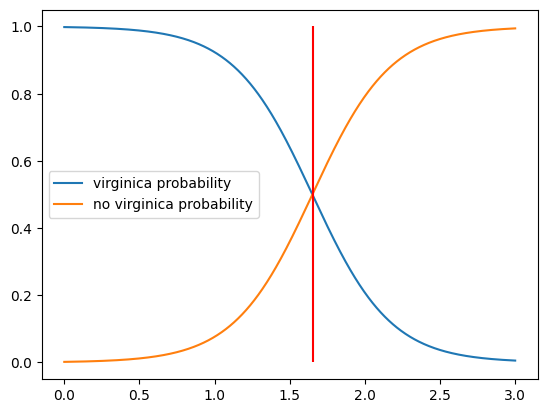

1.6516516516516517

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

X_new = np.linspace(0,3,1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 0], label="virginica probability")
plt.plot(X_new, y_proba[:, 1], label="no virginica probability")
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0,0]
plt.vlines(decision_boundary, 0, 1, "r")
plt.legend()
plt.show()
decision_boundary